In [4]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv('for_eda_data.csv')
df = pd.read_csv('for_eda_data.csv')
print(df.dtypes)

df['ISO_START_DATE'] = pd.to_datetime(df['ISO_START_DATE'])

df.head()

COUNTRY_NAME                  object
ISO_START_DATE                object
ISO_YEAR                       int64
ISO_WEEK                       int64
AGEGROUP_NUM                   int64
DETAILED_CASES_CONFIRMED       int64
DETAILED_CASES_DISCHARGED      int64
Susceptible                    int64
Infected                       int64
Recovered                      int64
Betta                        float64
Gamma                        float64
dtype: object


,COUNTRY_NAME,ISO_START_DATE,ISO_YEAR,ISO_WEEK,AGEGROUP_NUM,DETAILED_CASES_CONFIRMED,DETAILED_CASES_DISCHARGED,Susceptible,Infected,Recovered,Betta,Gamma
0,Armenia,2020-04-13,2020,16,0,278,348,2971243,89137,29712,1.049660e-09,0.003904
1,Armenia,2020-04-20,2020,17,0,455,295,2970965,89067,30060,1.719319e-09,0.003312
2,Armenia,2020-04-27,2020,18,0,640,202,2970510,89227,30355,2.414046e-09,0.002264
3,Armenia,2020-05-04,2020,19,0,927,290,2969870,89665,30557,3.479514e-09,0.003234
4,Armenia,2020-05-11,2020,20,0,1159,600,2968943,90302,30847,4.319643e-09,0.006644


In [23]:
latvia_data = df[df.COUNTRY_NAME == 'Latvia']
# latvia_data.set_index('ISO_START_DATE', inplace=True)
list_column = ['ISO_START_DATE', 'DETAILED_CASES_CONFIRMED', 'DETAILED_CASES_DISCHARGED', 
               'Susceptible', 'Infected', 'Recovered', 'Betta', 'Gamma'
              ]

latvia_data = latvia_data[list_column]
latvia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 989 to 1151
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ISO_START_DATE             163 non-null    datetime64[ns]
 1   DETAILED_CASES_CONFIRMED   163 non-null    int64         
 2   DETAILED_CASES_DISCHARGED  163 non-null    int64         
 3   Susceptible                163 non-null    int64         
 4   Infected                   163 non-null    int64         
 5   Recovered                  163 non-null    int64         
 6   Betta                      163 non-null    float64       
 7   Gamma                      163 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 11.5 KB


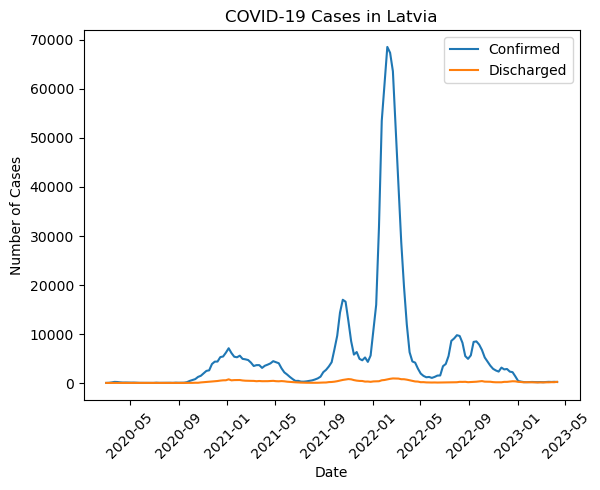

In [28]:
plt.plot(latvia_data.ISO_START_DATE, latvia_data['DETAILED_CASES_CONFIRMED'], label='Confirmed')
plt.plot(latvia_data.ISO_START_DATE, latvia_data['DETAILED_CASES_DISCHARGED'], label='Discharged')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Latvia')
plt.legend()
plt.xticks(rotation=45)
plt.show()

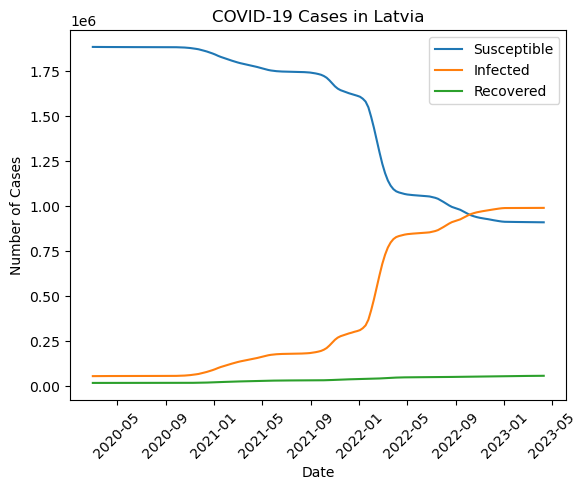

In [30]:
plt.plot(latvia_data.ISO_START_DATE, latvia_data['Susceptible'], label='Susceptible')
plt.plot(latvia_data.ISO_START_DATE, latvia_data['Infected'], label='Infected')
plt.plot(latvia_data.ISO_START_DATE, latvia_data['Recovered'], label='Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Latvia')
plt.legend()
plt.xticks(rotation=45)
plt.show()

подход к анализу взят с сайта: https://translated.turbopages.org/proxy_u/en-ru.ru.4c46fc0d-6492ecda-e79f33ad-74722d776562/https/www.projectpro.io/article/how-to-build-arima-model-in-python/544#mcetoc_1fp23v670h

подбираем значения для ARIMA для Латвии

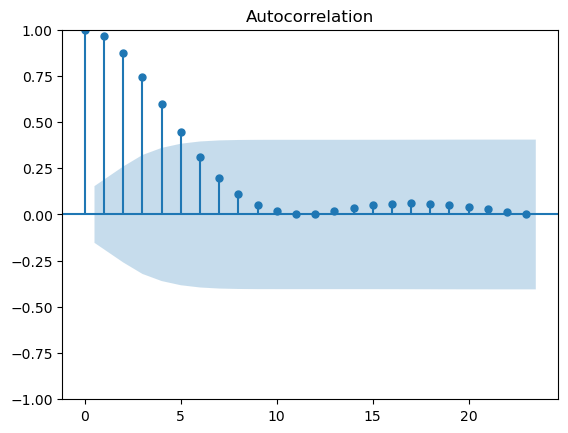

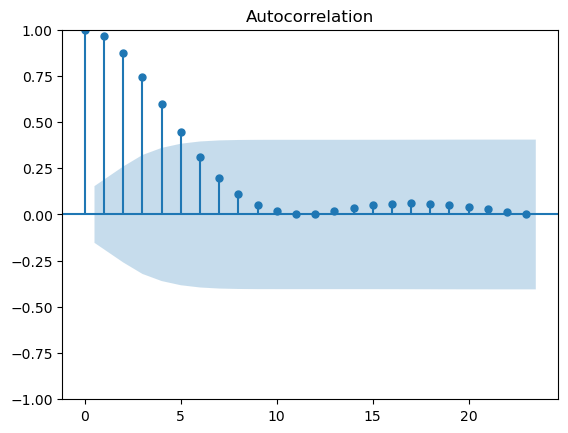

In [7]:
plot_acf(latvia_data.DETAILED_CASES_CONFIRMED)

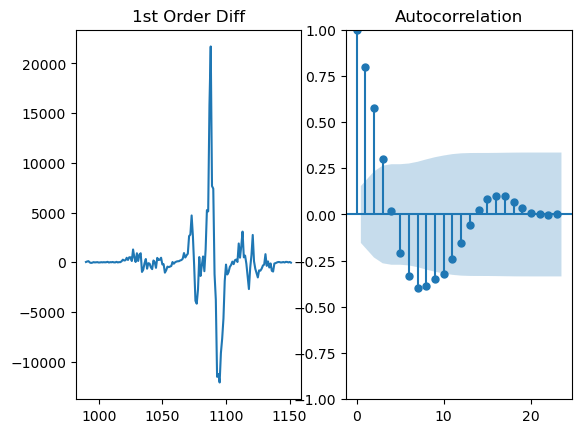

In [8]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(latvia_data.DETAILED_CASES_CONFIRMED.diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.DETAILED_CASES_CONFIRMED.diff().dropna(), ax=ax2)

plt.show()

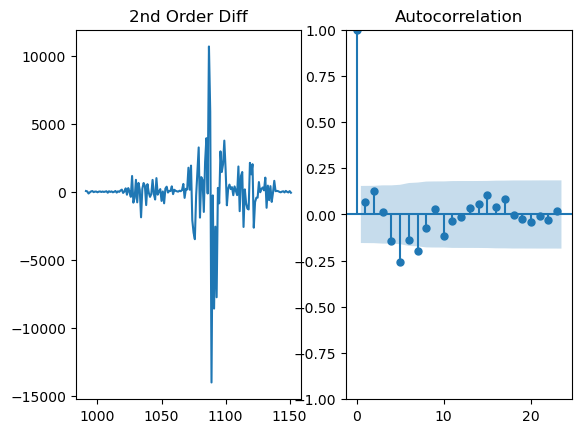

In [9]:
f = plt.figure()

ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(latvia_data.DETAILED_CASES_CONFIRMED.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(latvia_data.DETAILED_CASES_CONFIRMED.diff().diff().dropna(), ax=ax2)

plt.show()

In [31]:
res = adfuller(latvia_data.DETAILED_CASES_CONFIRMED)
print(f'p-value data: {res[1]}')

res = adfuller(latvia_data.DETAILED_CASES_CONFIRMED.diff().dropna())
print(f'p-value 1st diff: {res[1]}')

res = adfuller(latvia_data.DETAILED_CASES_CONFIRMED.diff().diff().dropna())
print(f'p-value 2nd diff: {res[1]}')

p-value data: 0.03397995907211336
p-value 1st diff: 3.990396165041958e-09
p-value 2nd diff: 1.6287335298106754e-08


можно принять d равным 0

Теперь подбираем параметр p

C:\Users\legyx\anaconda3\envs\forOtus\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


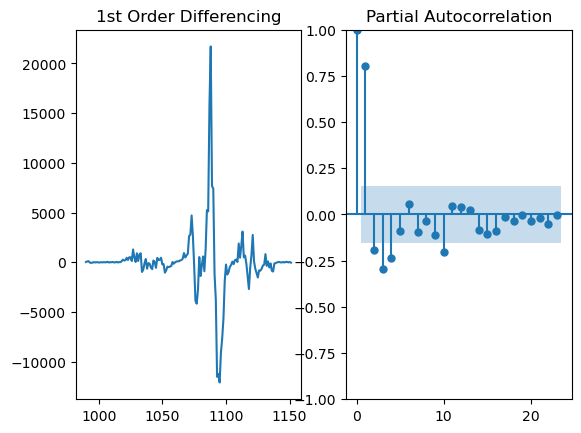

In [11]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(latvia_data.DETAILED_CASES_CONFIRMED.diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.DETAILED_CASES_CONFIRMED.diff().dropna(), ax=ax2)

plt.show()

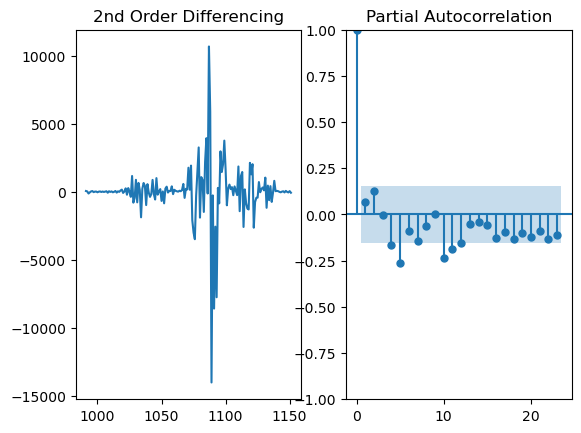

In [12]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(latvia_data.DETAILED_CASES_CONFIRMED.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(latvia_data.DETAILED_CASES_CONFIRMED.diff().diff().dropna(), ax=ax2)

plt.show()

На обоих графиках мы видим, что 1-е отставание является наиболее значительным. Таким образом, мы считаем, что “p” равно 1.

!!!!Наконец, “q” можно оценить аналогичным образом, посмотрев на график ACF вместо графика PACF. Глядя на количество задержек, пересекающих пороговое значение, мы можем определить, какая часть прошлого была бы достаточно значительной, чтобы учитывать ее в будущем. Те, которые имеют высокую корреляцию, вносят больший вклад и их будет достаточно для прогнозирования будущих значений. На приведенных выше графиках параметру скользящей средней (MA) можно присвоить значение 2.!!!!

Таким образом, нашу окончательную модель ARIMA можно определить как ARIMA(p=1, d=0, q= 2).

In [13]:
# from statsmodels.tsa.arima_model import ARIMA

arima_model = sm.tsa.ARIMA(latvia_data.DETAILED_CASES_CONFIRMED, order=(1, 0, 2)).fit()

# print(arima_model.summary())

n = latvia_data.shape[0]
p = 0.9 # разделение данных на тренировочные и тестовые
n_train = round(n * p)
n_test = round(n * (1-p))

n_train, n_test

C:\Users\legyx\anaconda3\envs\forOtus\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\legyx\anaconda3\envs\forOtus\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\legyx\anaconda3\envs\forOtus\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(147, 16)

In [14]:
Ldata = latvia_data.loc[:, ['ISO_START_DATE', 'Betta', 'Gamma', 'DETAILED_CASES_CONFIRMED']]

In [15]:
train_data = Ldata.iloc[:n_train]
test_data = Ldata.iloc[n_train:]

In [16]:
model_forecast_ = arima_model.forecast(steps=n_test)

C:\Users\legyx\anaconda3\envs\forOtus\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:

t = np.arange(0, n_train + n_test, 1)
len(t)

163

In [18]:
combined_data = pd.concat([train_data, test_data], axis=0)


In [19]:
len(arima_model.fittedvalues)

163

In [20]:
combined_data['model_forecast'] = np.concatenate([arima_model.fittedvalues[:n_train], model_forecast_])

C:\Users\legyx\AppData\Local\Temp\ipykernel_15400\3959987493.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  combined_data['model_forecast'] = np.concatenate([arima_model.fittedvalues[:n_train], model_forecast_])


In [21]:
model_forecast = combined_data['model_forecast'].values.flatten()
len(model_forecast)

163

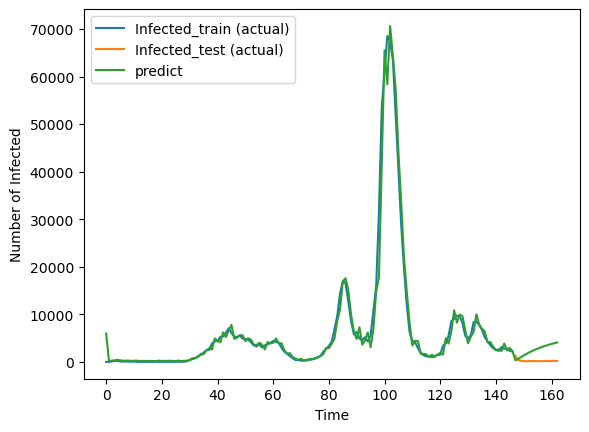

In [35]:
plt.plot(t[:n_train], train_data['DETAILED_CASES_CONFIRMED'], label='Infected_train (actual)')
plt.plot(t[n_train:], test_data['DETAILED_CASES_CONFIRMED'], label='Infected_test (actual)')
plt.plot(t, model_forecast, label='predict')
# plt.plot(t, latvia_data['Infected'][:len(t)], label='Infected <3')
plt.xlabel('Time')
plt.ylabel('Number of Infected')
plt.legend()
plt.show()

In [32]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     DETAILED_CASES_CONFIRMED   No. Observations:                  163
Model:                       ARIMA(1, 0, 2)   Log Likelihood               -1472.458
Date:                      Sun, 25 Jun 2023   AIC                           2954.917
Time:                              20:14:34   BIC                           2970.385
Sample:                                   0   HQIC                          2961.197
                                      - 163                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5980.3460   9516.581      0.628      0.530   -1.27e+04    2.46e+04
ar.L1          0.9284      0.017     55.014      0.000       0.895       0.961
ma.L1          0.8327      0.020     42.156      0.000       0.794       0.871
ma.L2          0.4215      0.038     11.179      0.000       0.348       0.495
sigma2      4.003e+06   1.88e+05     21.262      0.000    3.63e+06    4.37e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.47   Jarque-Bera (JB):              4008.23
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.69   Skew:                             3.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""